In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

from credentials import host
from credentials import pwd
from credentials import usr
from credentials import dialect
from credentials import port
from credentials import db

In [29]:
engine = create_engine(f'{dialect}://{usr}:{pwd}@{host}:{port}/{db}')
salary = pd.read_sql_table("salaries",engine)
employee = pd.read_sql_table("employee",engine)
titles = pd.read_sql_table("titles",engine)
engine.dispose()

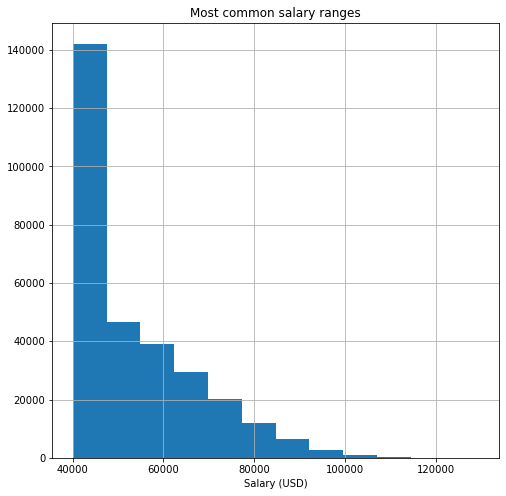

In [30]:
salary.hist("salary",bins=12, figsize=(8,8))
plt.title("Most common salary ranges")
plt.xlabel("Salary (USD)")
plt.show()

The majority of the employees are earning between 40K and 50K

In [31]:
titles = titles.loc[:,["emp_no","title"]]
salary = salary.loc[:,["emp_no","salary"]]
employee = employee.merge(salary, how="inner",on="emp_no")
employee = employee.merge(titles, how="inner",on="emp_no")

In [58]:
avg_salary = employee.loc[:,["salary","title"]].groupby(by="title").mean()
avg_salary = avg_salary.sort_values(by="salary",ascending=True)
avg_salary["salary"] = avg_salary["salary"].round(2)
#avg_salary["salary"] = avg_salary["salary"].map('${:,.2f}'.format)
#display(avg_salary)

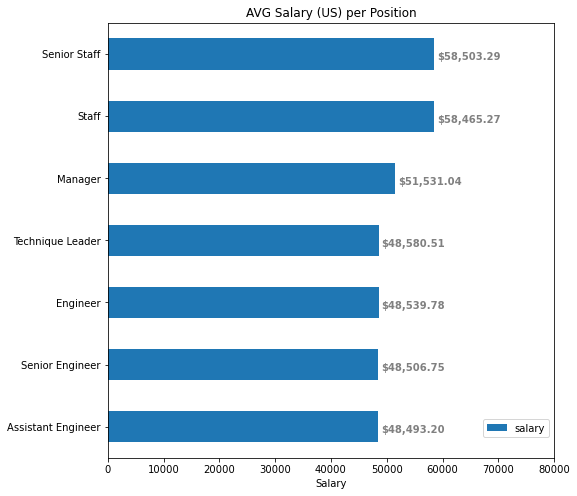

In [63]:
ax = avg_salary.plot(kind="barh", title="AVG Salary (US) per Position", figsize=(8,8))
plt.xlabel("Salary")
plt.xlim(0,80000)
plt.ylabel("")
ax.get_legend().set_bbox_to_anchor((1, 0.1))

#Add data labels to graph
for i, value in enumerate(avg_salary["salary"]):
    ax.text(value + 500, i - 0.1, str("${:,.2f}".format(value)), color='grey', fontsize=10, fontweight='bold')
    
plt.show()